In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/bhatti/dataset/VCHAMPS/immunization_train.csv'
immunization = pd.read_csv(path).iloc[:,1:]
immunization

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Complete,North Carolina
...,...,...,...,...,...,...,...,...,...,...
1847640,99988,77.191685,2003-12-20 13:27:45.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Florida
1847641,99993,58.944520,2008-01-24 05:19:38.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Kentucky
1847642,99999,87.997774,2004-11-27 04:28:15.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California
1847643,99999,89.989158,2006-11-25 00:53:27.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California


CVX code: This column contains the Center for Disease Control (CDC) code used for this vaccine  - this is the CVX code

In [61]:
len(immunization['Immunization'].unique())

533

Immunizations can basically categorized into Influence vaccine, covid-19 vaccine, pneumococcal, Tetanus / Diptheria Immunization, mumps, Hepatitis vaccine, varicella zoster, RABIES/INTRAMUSCULAR INJECTION, MENINGOCOCCAL

zostavax: a zoster vaccine for people over 60 years old

Measles, Mumps, and Rubella (MMR) 
Children get MMRV instead of MMR

Inactivated poliovirus vaccine (IPV)

Gardasil HPV vaccine

inactivated polio vaccine, IPV 
oral poliovirus vaccine, OPV


They seems not really related to cardiovascular or mortality??

In [3]:
immunization['Immunization'] = immunization['Immunization'].str.lower()
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'flu' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'hib' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'h1n1' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pneum' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'prevnar' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pcv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tet' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dtap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dt' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'td' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tdap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 't-dap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'diphtheria' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hepatitis' if 'hep' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'rabies/intramuscular injection' if 'rabi' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mumps' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmr' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'rubella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmrv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'm/r' in str(x) else str(x))

immunization.Immunization=  immunization.Immunization.apply(lambda x: 'meningococcal' if 'mening' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zoster' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'varicella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zostravax' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'hpv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'garda' in str(x) else str(x)) # gardacil & gardasil

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'covid' if 'covid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'ppd' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'skin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'yellow' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'typhoid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'zostav' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'shingles' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'polio' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'opv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'ipv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'japanese' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'encephalitis' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'vitamin' if 'vitamin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'bcg' if 'bcg' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'adenovirus' if 'adenovirus' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'twinrix' if 'twinrix' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'unlisted' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'nan' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'error' in str(x) else str(x))

In [5]:
tmp = pd.DataFrame(immunization['Immunization'].value_counts())
tmp = tmp.reset_index()
tmp.columns = ['Immunization', 'counts']
tmp = tmp.loc[:10,:]
tmp

,Immunization,counts
0,influence,1232789
1,pneumococcal,249410
2,tetanus/diptheria,181732
3,covid,90590
4,zoster,66130
5,hepatitis,22128
6,skin test,1237
7,bcg,1204
8,meningococcal,592
9,zostavax,445


In [15]:
tmp['Immunization'].unique()

array(['influence', 'pneumococcal', 'tetanus/diptheria', 'covid',
       'zoster', 'hepatitis', 'skin test', 'bcg', 'meningococcal',
       'zostavax', 'mmr'], dtype=object)

In [6]:
immunization_10 = immunization.loc[immunization['Immunization'].isin(tmp['Immunization'].unique())]
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,influence,NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,influence,NaN,NaN,NaN,150.0,Complete,North Carolina
...,...,...,...,...,...,...,...,...,...,...
1847640,99988,77.191685,2003-12-20 13:27:45.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),Florida
1847641,99993,58.944520,2008-01-24 05:19:38.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Kentucky
1847642,99999,87.997774,2004-11-27 04:28:15.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),California
1847643,99999,89.989158,2006-11-25 00:53:27.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),California


In [7]:
immunization_10 = immunization_10.drop_duplicates(subset = ['Internalpatientid','Immunization'],keep = 'first')
immunization_10 = immunization_10.reset_index(drop = True)
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100001,84.407099,2010-05-23 19:04:26.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
2,100008,70.572815,2019-10-06 08:44:11.0,influence,NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
3,100008,73.987220,2023-03-07 07:53:49.0,covid,NaN,NaN,NaN,207.0,2,North Carolina
4,100013,73.895239,2023-07-21 17:02:24.0,covid,NaN,NaN,Non-VA Facility,207.0,3,Michigan
...,...,...,...,...,...,...,...,...,...,...
392968,9984,84.398576,2003-10-14 16:18:25.0,pneumococcal,NaN,NaN,Private sector,109.0,Not specified (no value),Texas
392969,99867,60.324557,2014-10-01 15:00:51.0,tetanus/diptheria,NaN,NaN,NaN,115.0,Complete,Puerto Rico
392970,99888,72.521242,2004-10-23 12:20:06.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Virginia
392971,99969,75.186902,2002-02-19 19:30:29.0,pneumococcal,NaN,NaN,Non-VA Site,109.0,Not specified (no value),Florida


In [8]:
immunization_10['num_immunization'] = immunization_10['Immunization'].groupby(immunization_10['Internalpatientid']).transform('count')
immunization_10 = immunization_10.sort_values(by = 'Internalpatientid')
immunization_10 = immunization_10.reset_index(drop = True)
immunization_10

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State,num_immunization
0,1,62.296668,2006-07-23 10:22:13.0,pneumococcal,NaN,NaN,NaN,33.0,Complete,Indiana,6
1,1,70.586882,2014-11-08 12:07:45.0,influence,NaN,NaN,His work,128.0,Not specified (no value),Indiana,6
2,1,75.676984,2019-12-12 22:30:19.0,hepatitis,NaN,NaN,NaN,104.0,1,Indiana,6
3,1,72.166267,2016-06-07 18:29:37.0,tetanus/diptheria,NaN,NaN,NaN,115.0,Not specified (no value),Indiana,6
4,1,72.616963,2016-11-19 11:59:53.0,bcg,NaN,NaN,NaN,NaN,Not specified (no value),Indiana,6
...,...,...,...,...,...,...,...,...,...,...,...
392968,169062,71.818192,2003-06-03 13:10:39.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),Florida,1
392969,169063,74.508808,2002-02-10 23:15:39.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),New York,1
392970,169064,78.369057,2005-04-29 21:21:52.0,influence,NaN,NaN,NaN,88.0,Not specified (no value),Wyoming,3
392971,169064,80.311795,2007-04-09 23:03:46.0,pneumococcal,NaN,NaN,NaN,109.0,Not specified (no value),West Virginia,3


## Combine inpatient with immunization

In [9]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]

In [10]:
immunization_subset = immunization_10[['Internalpatientid', 'num_immunization']]

In [38]:
immunization_subset.describe()

,Internalpatientid,num_immunization
count,392973.000000,392973.000000
mean,84537.709817,3.645856
std,48753.768262,1.194494
min,1.000000,1.000000
25%,42395.000000,3.000000
50%,84658.000000,4.000000
75%,126701.000000,5.000000
max,169064.000000,8.000000


In [11]:
inpatient_immun = inpatient.merge(immunization_subset, how = 'inner', on = 'Internalpatientid')
inpatient_immun 

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission,num_immunization
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
1,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
2,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,3
3,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,3
4,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746621,99820,79.326955,2003-05-01 00:02:52.0,2003-05-19 09:17:02.0,MEDICINE,MEDICINE,GENERAL(ACUTE MEDICINE),Not specified (no value),Pneumonia due to Pseudomonas,Alcohol dependence,Regular,0,1,NaN,NaN,Nebraska,0,0,2
1746622,99820,79.326955,2003-05-01 00:02:52.0,2003-05-19 09:17:02.0,MEDICINE,MEDICINE,GENERAL(ACUTE MEDICINE),Not specified (no value),Pneumonia due to Pseudomonas,Alcohol dependence,Regular,0,1,NaN,NaN,Nebraska,0,0,2
1746623,99914,58.282514,2009-01-11 06:12:40.0,2009-01-12 21:12:34.0,NEUROLOGY,NEUROLOGY,SUBSTANCE ABUSE TRMT UNIT,NEUROLOGY,Other specified disorders of brain,Subjective visual disturbances,Regular,0,1,NaN,1.0,Kentucky,0,0,3
1746624,99914,58.282514,2009-01-11 06:12:40.0,2009-01-12 21:12:34.0,NEUROLOGY,NEUROLOGY,SUBSTANCE ABUSE TRMT UNIT,NEUROLOGY,Other specified disorders of brain,Subjective visual disturbances,Regular,0,1,NaN,1.0,Kentucky,0,0,3


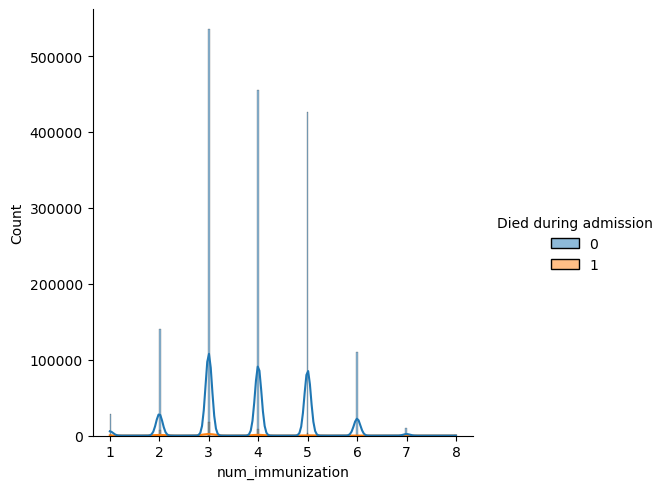

In [40]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Died during admission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Died during admission'>

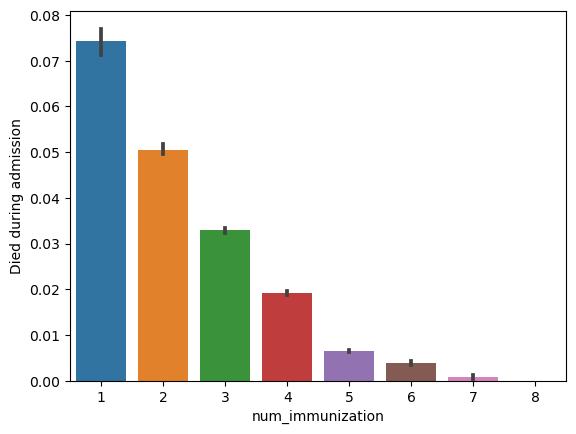

In [41]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Died during admission')

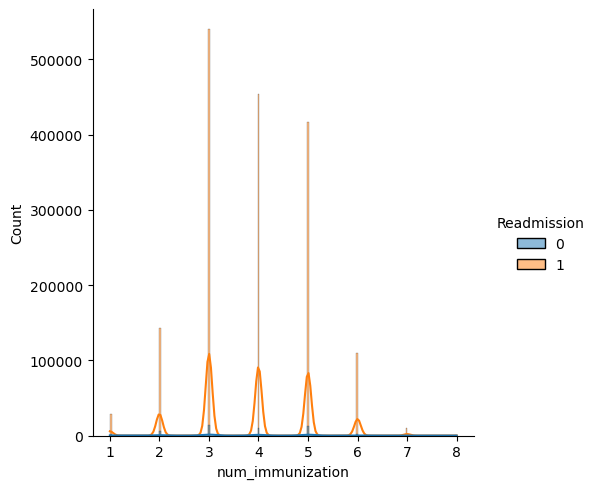

In [43]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Readmission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Readmission'>

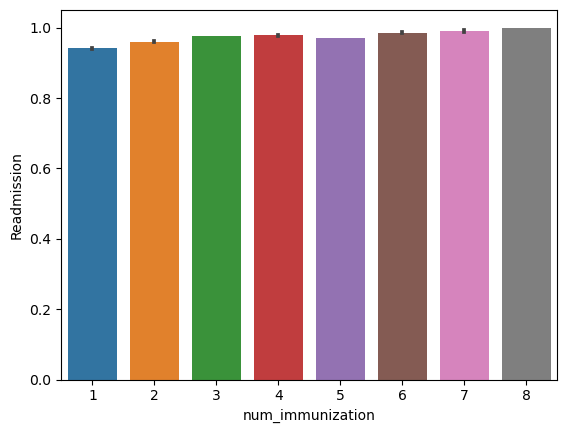

In [42]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Readmission')

/tmp/ipykernel_22265/3194461185.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


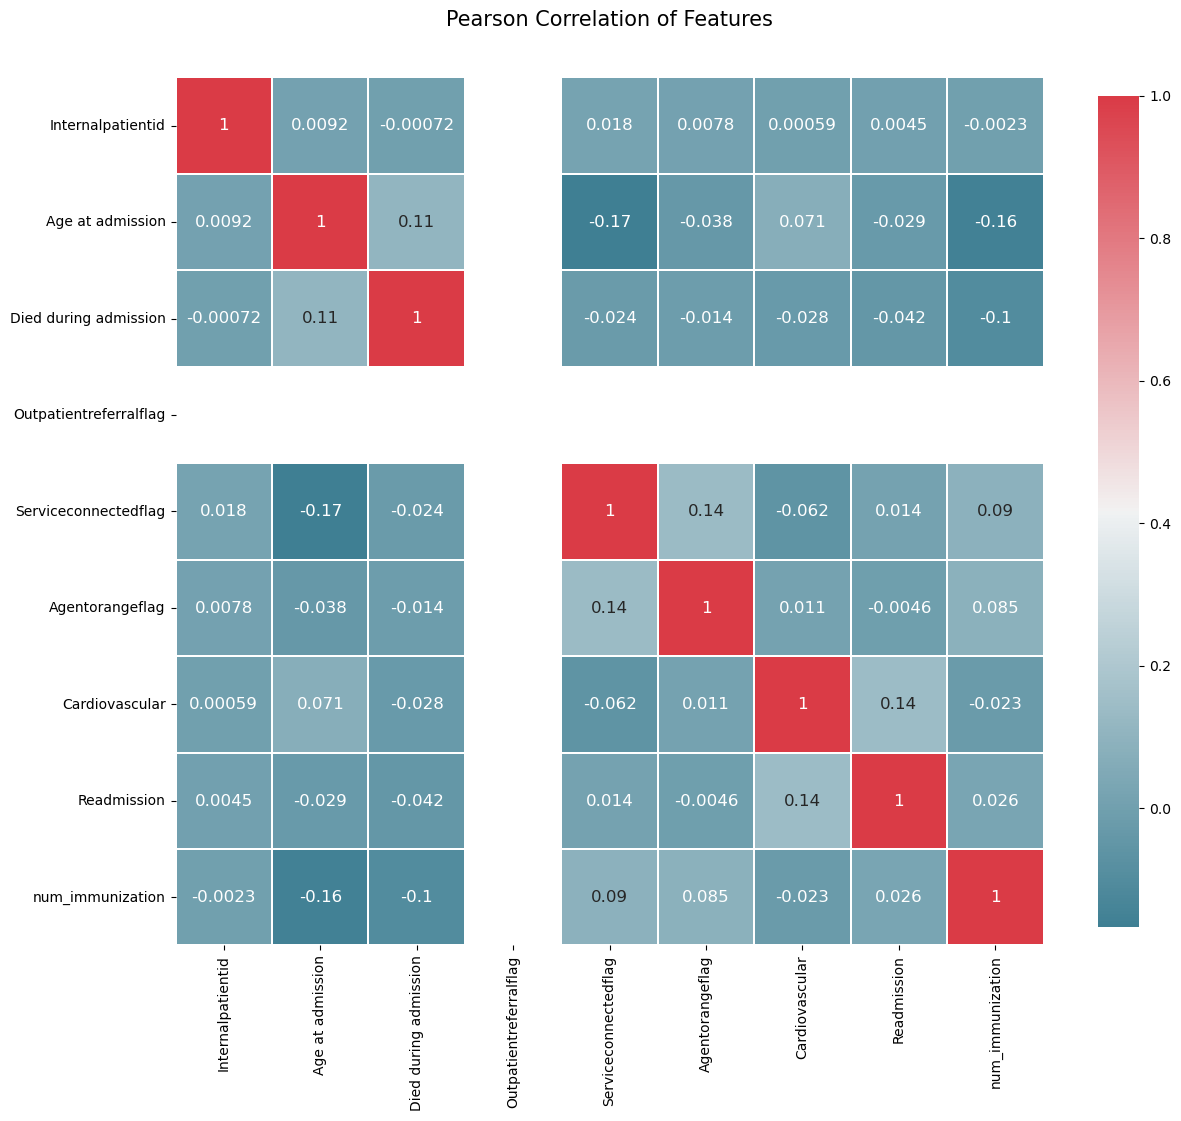

In [44]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_immun)

####################################
### Remove kurtosis and skewness

In [12]:
inpatient_immun.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Cardiovascular', 'Readmission', 'num_immunization'],
      dtype='object')

In [13]:
num_col = list(set(list(inpatient_immun._get_numeric_data().columns))- {'Readmission','Died during admission','Cardiovascular'})
num_col

['num_immunization',
 'Agentorangeflag',
 'Internalpatientid',
 'Cardiovascular',
 'Age at admission',
 'Outpatientreferralflag',
 'Serviceconnectedflag']

In [17]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2
def remove_skewness(df):
    statdataframe = pd.DataFrame()
    statdataframe['numeric_column'] = num_col
    skew_before = []
    skew_after = []

    kurt_before = []
    kurt_after = []

    standard_deviation_before = []
    standard_deviation_after = []

    log_transform_needed = []

    log_type = []

    for i in num_col:
        skewval = df[i].skew()
        skew_before.append(skewval)
        
        kurtval = df[i].kurtosis()
        kurt_before.append(kurtval)
        
        sdval = df[i].std()
        standard_deviation_before.append(sdval)
        
        if (abs(skewval) >2) & (abs(kurtval) >2):
            log_transform_needed.append('Yes')
            
            if len(df[df[i] == 0])/len(df) <=0.02:
                log_type.append('log')
                skewvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).skew()
                skew_after.append(skewvalnew)
                
                kurtvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).kurtosis()
                kurt_after.append(kurtvalnew)
                
                sdvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).std()
                standard_deviation_after.append(sdvalnew)
                
            else:
                log_type.append('log1p')
                skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
                skew_after.append(skewvalnew)
            
                kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
                kurt_after.append(kurtvalnew)
                
                sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
                standard_deviation_after.append(sdvalnew)
                
        else:
            log_type.append('NA')
            log_transform_needed.append('No')
            
            skew_after.append(skewval)
            kurt_after.append(kurtval)
            standard_deviation_after.append(sdval)

    statdataframe['skew_before'] = skew_before
    statdataframe['kurtosis_before'] = kurt_before
    statdataframe['standard_deviation_before'] = standard_deviation_before
    statdataframe['log_transform_needed'] = log_transform_needed
    statdataframe['log_type'] = log_type
    statdataframe['skew_after'] = skew_after
    statdataframe['kurtosis_after'] = kurt_after
    statdataframe['standard_deviation_after'] = standard_deviation_after
    return statdataframe

In [18]:
remove_skewness(inpatient_immun)

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_immunization,0.036941,-0.398932,1.159029,No,NA,0.036941,-0.398932,1.159029
1,Agentorangeflag,2.420798,3.860270,0.318461,Yes,log1p,2.420798,3.860270,0.220740
2,Internalpatientid,-0.019269,-1.209237,48940.235100,No,NA,-0.019269,-1.209237,48940.235100
3,Cardiovascular,-0.972490,-1.054264,0.449660,No,NA,-0.972490,-1.054264,0.449660
4,Age at admission,-0.033784,-0.205380,11.740571,No,NA,-0.033784,-0.205380,11.740571
5,Outpatientreferralflag,0.000000,0.000000,0.000000,No,NA,0.000000,0.000000,0.000000
6,Serviceconnectedflag,2.506140,4.280823,0.311885,Yes,log1p,2.506140,4.280823,0.216182


In [16]:
inpatient_immun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746626 entries, 0 to 1746625
Data columns (total 19 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   Internalpatientid                                    int64  
 1   Age at admission                                     float64
 2   Admission date                                       object 
 3   Discharge date                                       object 
 4   Admitting unit service                               object 
 5   Discharging unit service                             object 
 6   Admitting specialty                                  object 
 7   Discharging specialty                                object 
 8   First listed discharge diagnosis icd10 subcategory   object 
 9   Second listed discharge diagnosis icd10 subcategory  object 
 10  Discharge disposition                                object 
 11  Died during admission   